## Climate Data Analysis
Climate data is from the world bank; read more about these time series [here](https://climateknowledgeportal.worldbank.org/country/uruguay/climate-data-historical).

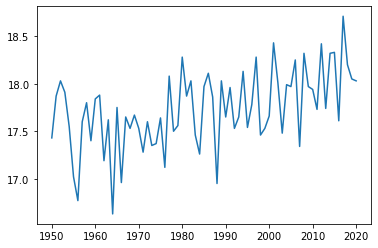

In [7]:
# No need to change this block 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
climate_df = pd.read_csv('https://raw.githubusercontent.com/maxoboe/6419_recitations/main/data/observed-average-annual-temperature-of-uruguay-for-1901-2020.csv')
climate_df = climate_df[climate_df.year >= 1950] # Need to adjust this to match length of ENSO records
year = climate_df.year.values.reshape(-1,1)
temp = climate_df.annual_mean.values.reshape(-1,1)
plt.plot(year, temp);

## Finding Seasonal Component 
We'll cover more structured ways to uncover a seasonal component later in the course. 
For now, let's just use trial and error, finding a well-fitting sinusoidal approximation. 

In [ ]:
# This block of code plots the mean squared error for a sinusoidal approximation
# with various guesses of the period. 
# Find the one you believe best captures the pattern. 
from scipy import optimize
period_range = np.arange(1, 50)
mse_list = []

# No need to change this function 
def find_sine_approximation(period ):
  """
  Finds a best-fitting sinusoidal approximation, for the given frequency. 
  """
  def sine_function(X, amp, phase_shift, mean):
    return (amp * np.sin(1/period * 2 * np.pi * (X - phase_shift)) + mean)
  params, _ = sine_curve_fit = optimize.curve_fit(
    f = sine_function,
    xdata = year.flatten(),
    ydata = temp.flatten(),
    p0 = np.array([3, 1, 0]))
  amp, phase_shift, mean = params
  sin_prediction = sine_function(year, amp, phase_shift, mean)
  return sin_prediction
for period in period_range:
  sin_prediction = find_sine_approximation(period)
  mse = np.nanmean((temp - sin_prediction) **2)
  mse_list.append(mse)
plt.plot(period_range, mse_list);
plt.show()

In [ ]:
period = <ADD YOUR BEST GUESS FOR THE PERIOD> 
temp_sin_hat = find_sine_approximation(period)
plt.plot(year, temp, label='original data')
plt.plot(year, temp_sin_hat, 'r', label='fitted line')
plt.legend()
plt.show()
sin_residuals = temp - temp_sin_hat
plt.plot(year, sin_residuals, 'o')
plt.show();
print("MSE with sinusoidal approximation", np.mean((temp - temp_sin_hat)**2))

## Including ENSO index
ENSO index is from [here](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php); we use ONI, which is a measure of how anomalously warm or cool the central-to-eastern equatorial Pacific Ocean is compared to "normal".

I've aggregated this data to yearly values to standardize the comparison; this index is only available from 1950-2020 so we focus on that range while incorporating this regressor. 

In [ ]:
# No need to change this block; reads data from github
import pandas as pd
enso_df = pd.read_csv('https://raw.githubusercontent.com/maxoboe/6419_recitations/main/data/enso_index.csv')
ONI = enso_df['ONI_index'].values.reshape(-1,1)
plt.plot(year, ONI)

In [ ]:
enso_predictions = <ADD CODE HERE TO PREDICT TEMPERATURE AS A FUNCTION OF ONI>
plt.plot(year, temp, label='original data')
plt.plot(year, enso_predictions, 'r', label='fitted line')
plt.legend()
plt.show()
enso_residuals = temp - enso_predictions
plt.plot(year, enso_residuals, 'o')
plt.show()
print("MSE with ENSO:", np.mean((temp - enso_predictions)**2))

## Fit a trend line
Fit a trend line on the residuals from predicting temperature with either ENSO pattern alone, the sinusoidal pattern alone, or both patterns.

In [ ]:
from sklearn import linear_model

linear_prediction = <ADD CODE TO GENERATE LINEAR PREDICTIONS>
plt.plot(year, enso_residuals, label='original data')
plt.plot(year, linear_prediction, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals = enso_residuals - linear_prediction
plt.plot(year, residuals, 'o')
plt.show();
print("MSE with linear fit and accounting for ENSO:", np.mean((temp - temp_hat)**2))

## Conclusions about Climate Change:
After accounting for internal variability (ENSO or other seasonal components), what is your best guess of the degree of warming since 1950? 

In [ ]:
# Add code to generate an answer about the degree of warming. 